In [2841]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
import time
import datetime
import random
import io
import folium
from dgraph import *
from numpy import random as np_random
from scipy.spatial import distance_matrix
from collections import defaultdict



In [2842]:
#Graph Class taken from : https://www.geeksforgeeks.org/find-paths-given-source-destination/

class Graph:
 
    def __init__(self, vertices):
        # No. of vertices
        self.V = vertices 
        self.paths = []
        # default dictionary to store graph
        self.graph = defaultdict(list) 
 
    # function to add an edge to graph
    def addEdge(self, u, v):
        self.graph[u].append(v)
 
    '''A recursive function to print all paths from 'u' to 'd'.
    visited[] keeps track of vertices in current path.
    path[] stores actual vertices and path_index is current
    index in path[]'''
    def printAllPathsUtil(self, u, d, visited, path):

        # Mark the current node as visited and store in path
        visited[u]= True
        path.append(u)

        # If current vertex is same as destination, then print
        # current path[]
        if u == d:
            print (path)
            l2 = path
            self.paths.append(l2.copy())
        else:
            # If current vertex is not destination
            # Recur for all the vertices adjacent to this vertex
            for i in self.graph[u]:
                if visited[i]== False:
                    self.printAllPathsUtil(i, d, visited, path)
                    
        # Remove current vertex from path[] and mark it as unvisited
        path.pop()
        visited[u]= False
 
 
    # Prints all paths from 's' to 'd'
    def printAllPaths(self, s, d):

        # Mark all the vertices as not visited
        visited =[False]*(self.V)

        # Create an array to store paths
        path = []

        # Call the recursive helper function to print all paths
        self.printAllPathsUtil(s, d, visited, path)
        print (path)
  

In [2843]:
#functions

#HERE I USED FOLIUM TO CREATE A MAP WHICH PLACES THE VALUES IN THE DATASET ON THE MAP

def Create_map(df):
        x  = []
        y = []
        for i in range(8):
                x.append(np_random.uniform(24.86, 34.0, size=1))
                y.append(np_random.uniform(67.01,74.3436,size=1))

        map = folium.Map(location=[df.Lattitude.mean(), df.Longitude.mean()], zoom_start=12,control_scale=True)
        #folium place markers
        for lat, lng, label in zip(df.Lattitude, df.Longitude, df.City):
            folium.Marker(location=[lat, lng], popup=label, marker_color='red').add_to(map)
        display(map)


#THIS IS A BASIC PLOT OF THE POints
#plot the lang and lat

def Create_Stations_and_Obstacles(df):

        plt.figure(figsize=(10,10))
        plt.scatter(df.Longitude, df.Lattitude)
        plt.xlabel('Longitude')
        plt.ylabel('Lattitude')

        rectangle = plt.Rectangle((69.05499773,27.30419314), 0.38, 0.95, fc='red',ec="red")
        #use y[1] and x[1] to get the coordinates of the rectangle
        rectangle2 = plt.Rectangle((68.40579368,32.2244921), 0.38,0.95 , fc='red',ec="red")
        #use y[2] and x[2] to get the coordinates of the rectangle
        rectangle3 = plt.Rectangle((73.95673648,30.2707003), 0.38, 0.95, fc='red',ec="red")
        #use y[3] and x[3] to get the coordinates of the rectangle
        rectangle4 = plt.Rectangle((69.65336426,31.05971192), 0.38, 0.95, fc='red',ec="red")
        #use y[4] and x[4] to get the coordinates of the rectangle
        rectangle5 = plt.Rectangle((73.52528668,26.72029817), 0.38, 0.95, fc='red',ec="red")
        #use y[5] and x[5] to get the coordinates of the rectangle
        rectangle6 = plt.Rectangle((72.34731228,31.6979375), 0.38, 0.95, fc='red',ec="red")
        #use y[6] and x[6] to get the coordinates of the rectangle
        rectangle7 = plt.Rectangle((67.32759484,27.59375763), 0.38, 0.95, fc='red',ec="red")
        #use y[7] and x[7] to get the coordinates of the rectangle
        rectangle8 = plt.Rectangle((72.11769889,25.95242895), 0.38, 0.95, fc='red',ec="red")
        #use y[8] and x[8] to get the coordinates of the rectangle

        plt.gca().add_patch(rectangle)
        plt.gca().add_patch(rectangle2)
        plt.gca().add_patch(rectangle3)
        plt.gca().add_patch(rectangle4)
        plt.gca().add_patch(rectangle5)
        plt.gca().add_patch(rectangle6)
        plt.gca().add_patch(rectangle7)
        plt.gca().add_patch(rectangle8)

        plt.axis('scaled')
        plt.show()        




def Calcluate_distance_Matrix(df):
        counter = 0
        distances = []
        cities =[]
        for i in range(len(df)):
            cities.append(df.City[i])
        data = []
        for i in range(len(df)):
            l2 = [df.iloc[i].Longitude, df.iloc[i].Lattitude]
            #print(l2)
            data.append(l2)
        df = pd.DataFrame(data, columns=['xcord', 'ycord'], index=cities)
        dist_m = pd.DataFrame(distance_matrix(df.values, df.values), index=df.index, columns=df.index)
        dist_m.to_csv('dist_m.csv')



def Calculate_fitness(distancegraph_list ):
    fitness_list = []
    temp = []
    sum = 0
    for i in range(len(distancegraph_list)):
      for j in range(len(distancegraph_list[i])-1):
        x = distancegraph_list[i][j]
        y = distancegraph_list[i][j+1]
        sum = sum + ist_mat[x][y]
        x =0
        y = 0
      fitness_list.append(sum)
      sum = 0
    return fitness_list  


def Calculate_max_fitness(fitness_list):
    max_value = max(fitness_list)
    max_index = fitness_list.index(max_value)
    return max_index

def Calculate_Parents(fitness_list):
    min_value = min(fitness_list)
    min_index = fitness_list.index(min_value)

    a = distancegraph.paths[min_index]
    temp_fitness_list = fitness_list
    pre_fitness_list = fitness_list

    temp_fitness_list.remove(min_value)

    second_min_value = min(temp_fitness_list)
    second_min_index = temp_fitness_list.index(second_min_value)

    b = distancegraph.paths[second_min_index]

    temp_fitness_list.insert(0,min_value)

    return a,b


def Calculate_Crossover_Inetersection_Point(a,b):
    parent1 = list(a)
    parent2 = list(b)

    flag = 0
    list1_as_set = set(parent1)
    intersection = list1_as_set.intersection(parent2)

    if intersection != []:
      intersection_as_list = list(intersection)
    else:
      random_intersection_point = random.choice(parent1)
      flag = 1
    if flag ==1:
        final_intersection_point = random_intersection_point
    else:
        final_intersection_point = random.choice(intersection_as_list)
    return final_intersection_point


def single_point_crossover(a,b,final_intersection_point):
      parent1 = np.array(a)
      parent2 = np.array(b)
      child1 = np.append(parent1[:final_intersection_point] , parent2[final_intersection_point:])
      child2 = np.append(parent2[:final_intersection_point] , parent1[final_intersection_point:])

      #converting child1 to list
      child1_list = child1.tolist()
      child1_list

      return child1_list

def Updating_population(child1_list):
        check = False
        for i in range(len(distancegraph.paths)):
            if child1_list == distancegraph.paths[i]:
                check = True
                break
            else:
                check = False 

        #Updating the population after the Crossover e.g putting new child in population
        if check == False:
            distancegraph.paths[max_index] = child1_list


def mutation (chromosome):
    mutated_chromosome = chromosome
    mutated_chromosome[1] = random.randint(0,10)
    return mutated_chromosome    





In [2844]:
df = pd.read_csv('data.csv')
df.head()

,City,Lattitude,Longitude
0,Islamabad,33.6989,73.0369
1,Lahore,31.5497,74.3436
2,Karachi,24.8600,67.0100
3,Peshawar,34.0000,71.5000
4,Hyderabad,25.3792,68.3683


In [2845]:
 #HERE I CALCULATE THE  min/max lang/lat values
values =(df.Longitude.min(), df.Lattitude.min(), df.Longitude.max(), df.Lattitude.max())


In [2846]:


Create_map(df)


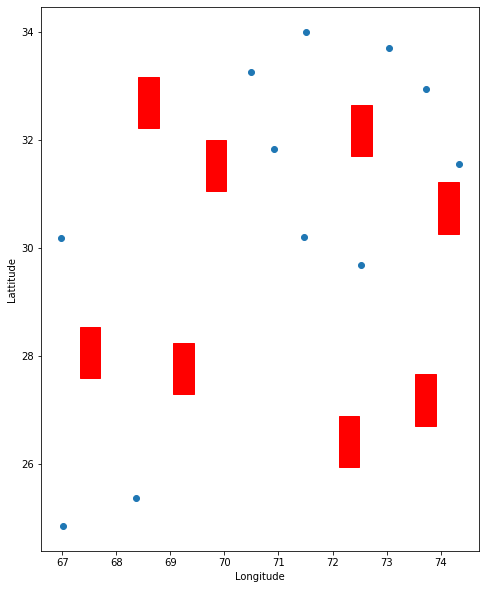

In [2847]:




Create_Stations_and_Obstacles(df)


In [2848]:
#calculate distance between each langitute and lattitude point
#calculate distance between each points and save in array


Calcluate_distance_Matrix(df)






In [2849]:
islamabad = 0
lahore = 1
karachi=2
peshawar=3
hyderabad=4
jhelum=5
multan=6
shewa=7
quetta=8
dera_ismail_khan=9
cholistan=10

            #0  1  2  3  4  5  6  7  8  9 10
path_mat = [[0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0], #1
            [0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1], #1
            [0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0], #2
            [1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0], #3
            [0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0], #4
            [1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0], #5    
            [1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0], #6
            [0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0], #7
            [0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], #8
            [0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1], #9
            [0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0]] #10
            

In [2850]:


             #0  1  2  3  4  5  6  7  8  9 10
ist_mat =   [[0, 0, 0, 1.5661, 0, 1.0258, 3.8353, 0, 0, 0, 0],    #0
            [0, 0, 0, 0, 0, 1.5211, 0, 0, 0, 3.4437, 2.6004],     #1
            [0, 0, 0, 0, 1.4541, 0, 0, 0, 5.3199, 0, 0],          #2
            [1.5661, 0, 0, 0, 0, 0, 3.8023, 0, 5.9219, 0, 0],     #3
            [0, 0, 1.4541, 0, 0, 0, 0, 0, 0, 6.9357, 0],          #4
            [1.0258, 1.5211, 0, 0, 0, 0, 3.5516, 0, 0, 0, 0],     #5 
            [3.8353, 0, 0, 3.8023, 0, 3.5516, 0, 3.2074, 0, 0, 0],#6
            [0, 0, 0, 0, 0, 0, 3.2074, 0, 4.6745, 1.4810, 0],     #7
            [0, 0, 5.3199, 5.9219, 0, 0, 0, 4.6745, 0, 0, 0],     #8
            [0, 3.4437, 0, 0, 0, 0, 0, 1.4811, 0, 0, 2.6782],     #9
            [0, 2.6004, 0, 0, 0, 0, 0, 0, 0, 2.6782, 0] ]         #10






In [2851]:

distancegraph = Graph(11)  
distancegraph.addEdge(0,3)
distancegraph.addEdge(0,5)
distancegraph.addEdge(0,6)
distancegraph.addEdge(1,5)
distancegraph.addEdge(1,9)
distancegraph.addEdge(1,10)
distancegraph.addEdge(2,4)
distancegraph.addEdge(2,8)
distancegraph.addEdge(3,0)
distancegraph.addEdge(3,6)
distancegraph.addEdge(3,8)
distancegraph.addEdge(4,2)
distancegraph.addEdge(4,9)
distancegraph.addEdge(5,0)
distancegraph.addEdge(5,1)
distancegraph.addEdge(5,6)
distancegraph.addEdge(6,0)
distancegraph.addEdge(6,3)
distancegraph.addEdge(6,5)
distancegraph.addEdge(6,7)
distancegraph.addEdge(7,6)
distancegraph.addEdge(7,8)
distancegraph.addEdge(7,9)
distancegraph.addEdge(8,2)
distancegraph.addEdge(8,3)
distancegraph.addEdge(8,7)
distancegraph.addEdge(9,1)
distancegraph.addEdge(9,7)
distancegraph.addEdge(9,10)
distancegraph.addEdge(10,1)
distancegraph.addEdge(10,9)
distancegraph.printAllPaths(0,3)

distancegraph.paths

[0, 3]
[0, 5, 1, 9, 7, 6, 3]
[0, 5, 1, 9, 7, 8, 3]
[0, 5, 1, 10, 9, 7, 6, 3]
[0, 5, 1, 10, 9, 7, 8, 3]
[0, 5, 6, 3]
[0, 5, 6, 7, 8, 3]
[0, 6, 3]
[0, 6, 5, 1, 9, 7, 8, 3]
[0, 6, 5, 1, 10, 9, 7, 8, 3]
[0, 6, 7, 8, 3]
[]


[[0, 3],
 [0, 5, 1, 9, 7, 6, 3],
 [0, 5, 1, 9, 7, 8, 3],
 [0, 5, 1, 10, 9, 7, 6, 3],
 [0, 5, 1, 10, 9, 7, 8, 3],
 [0, 5, 6, 3],
 [0, 5, 6, 7, 8, 3],
 [0, 6, 3],
 [0, 6, 5, 1, 9, 7, 8, 3],
 [0, 6, 5, 1, 10, 9, 7, 8, 3],
 [0, 6, 7, 8, 3]]

In [2852]:
#Genetic Algorithm Implementation :

loop_var = 0
while(loop_var<10):
    distancegraph_list = distancegraph.paths.copy()
    fitness_list = Calculate_fitness(distancegraph_list)
    if loop_var == 0:
        first_fitness_list = fitness_list.copy()
    max_index = Calculate_max_fitness(fitness_list)
    a,b = Calculate_Parents(fitness_list)
    final_intersection_point = Calculate_Crossover_Inetersection_Point(a,b)
    child1_list = single_point_crossover(a , b , final_intersection_point)
    Updating_population(child1_list)  
    loop_var = loop_var+1





In [2853]:
print("Initial population of Chromosomes/Paths form Source to destination : ")
distancegraph.paths

Initial population of Chromosomes/Paths form Source to destination : 


[[0, 3],
 [0, 5, 1, 9, 7, 6, 3],
 [0, 5, 1, 9, 7, 8, 3],
 [0, 5, 1, 10, 9, 7, 6, 3],
 [0, 5, 1, 10, 9, 7, 8, 3],
 [0, 5, 6, 3],
 [0, 5, 6, 7, 8, 3],
 [0, 6, 3],
 [0, 6, 5, 1, 9, 7, 8, 3],
 [0, 3, 7, 8, 3],
 [0, 6, 7, 8, 3]]

In [2854]:
print( "Initial Fitness values of all Chromosomes(weights of all paths) :")
print(first_fitness_list)

Initial Fitness values of all Chromosomes(weights of all paths) :
[1.5661, 14.4814, 18.0681, 16.3163, 19.903, 8.3797, 18.3812, 7.6376, 24.4292, 26.264100000000003, 17.6391]


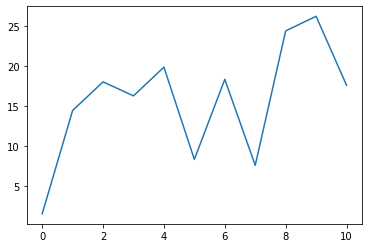

In [2855]:
#Graph of intial Fitness Values :
plt.plot(first_fitness_list)

In [2856]:
print ("Parents of Final Generation of Genetic Algorithm : ")
print (a)
print (b)

Parents of Final Generation of Genetic Algorithm : 
[0, 3]
[0, 5, 6, 7, 8, 3]


In [2857]:
print ("Intersection Point for final Cross-Over between final Parents(chromosomes):")
print(final_intersection_point)

Intersection Point for final Cross-Over between final Parents(chromosomes):
3


In [2858]:
print("Child of the Final Cross-Over between final Parents(chromosomes):")
print(child1_list)

Child of the Final Cross-Over between final Parents(chromosomes):
[0, 3, 7, 8, 3]


In [2859]:
#Fitness Values of Chromosomes after Genetic algorithm :
fitness_list

[1.5661,
 14.4814,
 18.0681,
 16.3163,
 19.903,
 8.3797,
 18.3812,
 7.6376,
 24.4292,
 12.162500000000001,
 17.6391]

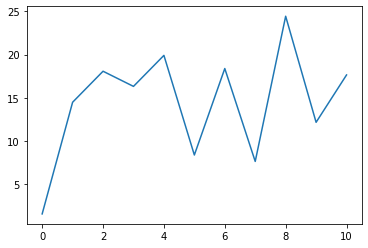

In [2860]:
#Graph of Fitness Values of Chromosomes  after Genetic Algorithm :
plt.plot(fitness_list)

In [2861]:
min_fitness_value = min(fitness_list)
min_index_of_fintess = fitness_list.index(min_fitness_value)

print("THE BEST FIT OR OPTIMAL PATH/CHROMOSOME AFTER APPLYING GENETIC ALGORITHM IS :")
distancegraph.paths[min_index_of_fintess]

THE BEST FIT OR OPTIMAL PATH/CHROMOSOME AFTER APPLYING GENETIC ALGORITHM IS :


[0, 3]

In [2862]:
#PERFORMING MUTATION :

mutation_index = Calculate_max_fitness(fitness_list)
unmutated_chromosome = distancegraph.paths[mutation_index]
distancegraph.paths[mutation_index] = mutation(unmutated_chromosome)

# Population of Mutated Chromosomes after performing Mutation :
print ("Population of Paths/Chromosomes after performing Mutation :")
fitness_list_after_mutation = Calculate_fitness(distancegraph_list)
distancegraph.paths

Population of Paths/Chromosomes after performing Mutation :


[[0, 3],
 [0, 5, 1, 9, 7, 6, 3],
 [0, 5, 1, 9, 7, 8, 3],
 [0, 5, 1, 10, 9, 7, 6, 3],
 [0, 5, 1, 10, 9, 7, 8, 3],
 [0, 5, 6, 3],
 [0, 5, 6, 7, 8, 3],
 [0, 6, 3],
 [0, 5, 5, 1, 9, 7, 8, 3],
 [0, 3, 7, 8, 3],
 [0, 6, 7, 8, 3]]

In [2863]:
#Fitness Values of Chromosomes after Performing mutation and genetic alogrithm:
fitness_list_after_mutation

[1.5661,
 14.4814,
 18.0681,
 16.3163,
 19.903,
 8.3797,
 18.3812,
 7.6376,
 18.0681,
 12.162500000000001,
 17.6391]

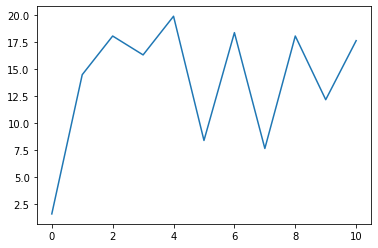

In [2864]:
#Graph of fitness list after Mutaion and genetic algorithm :

plt.plot(fitness_list_after_mutation)
